<a href="https://colab.research.google.com/github/jlrm-batstateu/LE1_Matibag_JL/blob/main/LabExam2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/ML_Lab

/content/drive/MyDrive/ML_Lab


In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [39]:
df = pd.read_excel('dataset_re.xlsx')

In [40]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [41]:
df.drop(['No'], axis=1, inplace=True)

In [42]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [43]:
df.rename(columns={'X1 transaction date': 'transacDate',
                   'X2 house age': 'houseAge',
                   'X3 distance to the nearest MRT station': 'distanceToMRT',
                   'X4 number of convenience stores': 'numOfConv',
                   'X5 latitude':'lat',
                   'X6 longitude': 'long',
                   'Y house price of unit area': 'unitPrice'}, inplace=True)

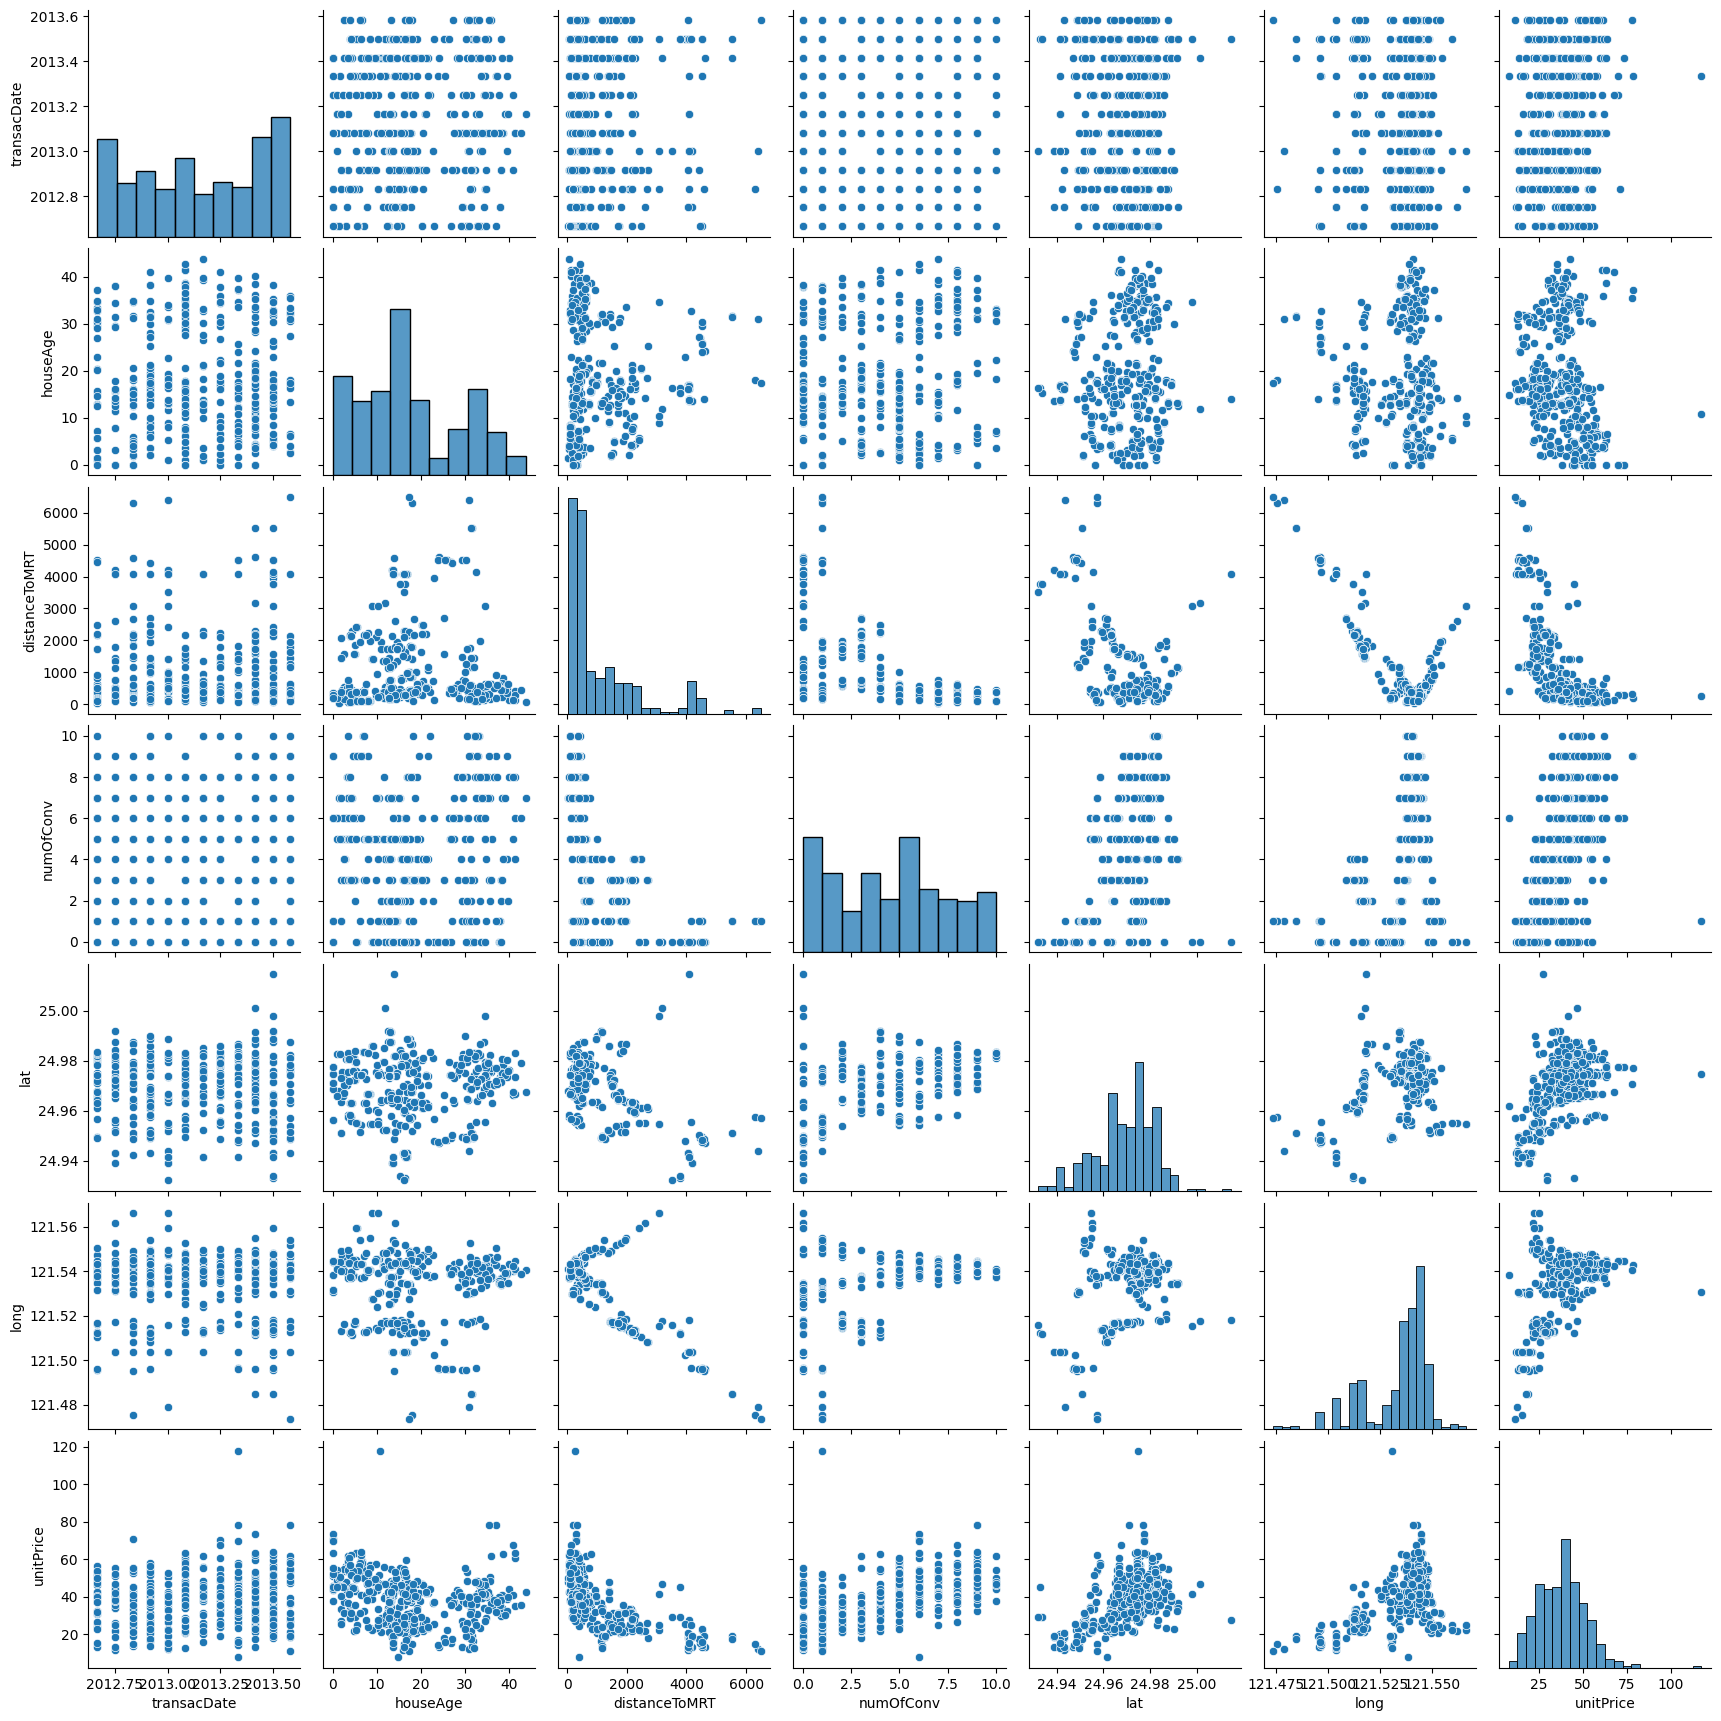

In [44]:
sns.pairplot(df)

In [18]:
checkNULL = df.isnull()
checkNULL = checkNULL.any(axis=1)
df[checkNULL]

,No,transacDate,houseAge,distanceToMRT,numOfConv,lat,long,unitPrice


In [19]:
df = df.drop_duplicates().reset_index(drop=True)

In [32]:
X= df[['transacDate','houseAge','numOfConv','lat','long']].values
y = df['unitPrice'].values

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [35]:
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

Mean Squared Error:  70.13962433878044


In [36]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Squared Error: ", rmse)

Root Squared Error:  8.374940258818592


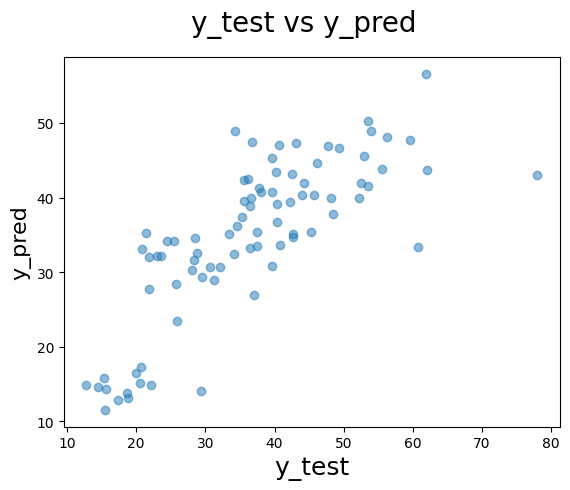

In [37]:
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)
plt.show()

In [38]:
from joblib import dump, load
dump(pipeline, 'model2.joblib')

['model2.joblib']